# Reading files

In [1]:
import your

## Loading data

Download and extract a sample filterbank. Here we use the filterbanks containing [FRB180417](https://doi.org/10.1093/mnras/stz2574).

In [2]:
import logging

logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(level=logging.INFO, format=logging_format)

In [3]:
import os
import tempfile
import pylab as plt
from urllib.request import urlretrieve

In [4]:
temp_dir = tempfile.TemporaryDirectory()
download_path = str(temp_dir.name) + "/FRB180417.fil"
url = "https://zenodo.org/record/3905426/files/FRB180417.fil"
urlretrieve(
    url, download_path,
)
fil_file = download_path

## Unified Reader

We can now read the file using [Your](https://thepetabyteproject.github.io/your/your/) as,

In [5]:
your_object = your.Your(fil_file)

Similarly using `your` we can read 
* list of psrfits files,
* single psrfits file,
* single filterbank file.

## Unified Header

Regardless of the file source, each `your` object has a unified header which can be accessed as follows. [your_header](https://thepetabyteproject.github.io/your/your/#header) displays all the attributes. These can be accessed as `your_object.your_header.attribute`, e.g. to get the sampling interval use `your_object.your_header.tsamp`.

In [6]:
print(your_object.your_header)

Unified Header:
  "basename": "FRB180417"
  "bw": -336.0
  "center_freq": 1297.0
  "dec_deg": 13.9644755659
  "dtype": "uint8"
  "fch1": 1465.0
  "filelist": [
    "/tmp/tmpw6ij63kz/FRB180417.fil"
  ]
  "filename": "/tmp/tmpw6ij63kz/FRB180417.fil"
  "foff": -1.0
  "format": "fil"
  "frequency_decimation_factor": 1
  "gb": 75.6193324131258
  "gl": 97.96004046706304
  "native_foff": -1.0
  "native_nchans": 336
  "native_nspectra": 5120.0
  "native_tsamp": 0.00126646875
  "nbits": 8
  "nchans": 336
  "npol": 1
  "nspectra": 5120
  "ra_deg": 186.656816998
  "source_name": "src1"
  "time_decimation_factor": 1
  "tsamp": 0.00126646875
  "tstart": 58682.620316710374
  "tstart_utc": "2019-07-18T14:53:15.364"



## Reading data

You can read the data in the file using the [get_data](https://thepetabyteproject.github.io/your/your/#get_data) method. The output is a numpy array with shape (nsamp, nchans).

In [7]:
data = your_object.get_data(nstart=0, nsamp=4096)
data.shape

(4096, 336)

And display the data!

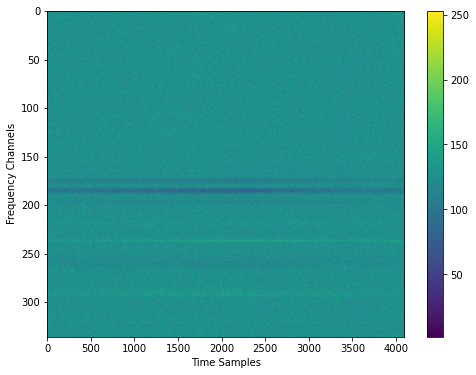

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(data.T, aspect="auto")
plt.xlabel("Time Samples")
plt.ylabel("Frequency Channels")
plt.colorbar()

## Bandpass

You can create the bandpass of the entire file or a few specific spectra by using [your_object.bandpass](https://thepetabyteproject.github.io/your/your/#bandpass)

In [9]:
bandpass = your_object.bandpass()

2020-11-02 13:26:46,939 - bandpass -your.your - WARNING - This will read all the data in the RAM. Might be slow as well.


And plot and save the bandpass using the [save_bandpass](https://thepetabyteproject.github.io/your/utils/plotter/#save_bandpass-function) function from [your.utils.plotter](https://thepetabyteproject.github.io/your/utils/plotter/).

In [10]:
from your.utils.plotter import save_bandpass

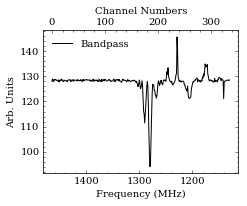

In [11]:
save_bandpass(your_object, bandpass)